In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# Colab 폴더로 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


# AutoEncode
---
- 표현(특징)학습
  - 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
- 구성
  - 인코더(Encoder) : 입력 데이터에서 주요 특징 추출
  - 디코더(Decoder) : 주요 특징에서 원데이터로 복원

In [63]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [64]:
set_random_seed=11

# [1] 데이터 준비 및 로딩

In [65]:
(x_train,y_train),(x_test,y_test) = load_data()

In [66]:
print(x_train.shape ,y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# [2] 데이터 전처리

In [67]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [68]:
print(x_train.shape ,y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [69]:
x_train = x_train/255
x_test = x_test/255

In [70]:
x_train[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train)

In [72]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train)

In [73]:
print(x_train.shape ,x_test.shape, x_val.shape)

(33750, 784) (10000, 784) (11250, 784)


# [3] 모델 구성 및 생성

In [74]:
def createModel(n_node):
  model = Sequential()
  model.add(Dense(units = n_node, activation='relu', input_shape = (784,)))
  model.add(Dense(784, activation='sigmoid'))
  model.compile(loss = 'mean_squared_error',
                optimizer = 'adam')
  return model

In [75]:
Model10 = createModel(10)
Model50 = createModel(50)
Model100 = createModel(100)

In [76]:
Model10.fit(x_train,x_train,epochs=1)
Model50.fit(x_train,x_train,epochs=1)
Model100.fit(x_train,x_train,epochs=1)

1055/1055 [==============================] - 3s 3ms/step - loss: 0.0280


In [77]:
Model10.summary(),Model50.summary(),Model100.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 784)               8624      
                                                                 
Total params: 16,474
Trainable params: 16,474
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                39250     
                                                                 
 dense_9 (Dense)             (None, 784)               39984     
                                                                 
Total params: 79,234
Trainab

(None, None, None)

# [4] 테스트

In [78]:
print(Model10.evaluate(x_test,x_test))
print(Model50.evaluate(x_test,x_test))
print(Model100.evaluate(x_test,x_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0380
0.038008276373147964
313/313 [==============================] - 1s 2ms/step - loss: 0.0183
0.01831444725394249
313/313 [==============================] - 1s 2ms/step - loss: 0.0113
0.011265808716416359


# [5] 예측

### 원본 이미지 -AE 진행된 이미지 비교

In [79]:
pre_out10 = Model10.predict(x_test[0].reshape(-1,784))
pre_out50 = Model50.predict(x_test[0].reshape(-1,784))
pre_out100 = Model100.predict(x_test[0].reshape(-1,784))

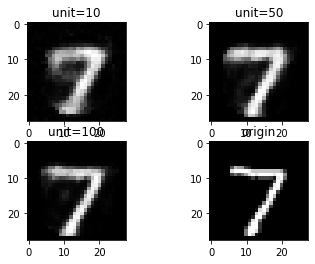

In [80]:
plt.subplot(2, 2, 1) 
plt.imshow(pre_out10.reshape(28,28),cmap ='gray')
plt.title('unit=10')

plt.subplot(2, 2, 2) 
plt.imshow(pre_out50.reshape(28,28),cmap ='gray')
plt.title('unit=50')

plt.subplot(2, 2, 3) 
plt.imshow(pre_out100.reshape(28,28),cmap ='gray')
plt.title('unit=100')

plt.subplot(2, 2, 4) 
plt.title('origin')
plt.imshow(x_test[0].reshape(28,28),cmap='gray')
plt.show()